In this project, I will try to find what is the optimum time to take my morning shower.

Context:
Before the morning shower, I have to open the hot water and wait a few minutes so that the water reaches 35 degrees Celsius. My hot water comes from the city facilities, not from a building system.

Objective:
Reduce the costs by reducing the amount of water consumed before the shower

The waiting time to get hot water is influenced by:
- the number of neighbours that already took a shower (if neighbours took already shower, time is reduced, because hot water is already in the pipes) 

Of course I cannot record the behaviour of my neighbours, but I can record:
- elapsed time needed to get water at 35 degrees Celsius (seconds)
- starting hour of my shower (hh:mm)


Why is this project important:
- I estimate that at least 30% of my warm water consumption comes from waiting for it to get hot enough.
  If I can reduce it to 5-10%, it will be an important reduction on costs
  
Data is recorded for a month by me. It contains:
- the starting hour of opening the hot water (starting_time), 
- the elapsed time needed to get water at 35 degrees (elapsed_t) 

In order to have a fair measurement, I will have one measurement per morning. The time interval of my shower will be between  6.30-9 am. 

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('Time2Shower.csv')
df = df.drop(['day_nr'], axis = 1)

In [3]:
df['starting_time'] = pd.to_datetime(df['starting_time'],
                                    format='%H:%M').dt.time


In [4]:
df = df.set_index(['starting_time'])

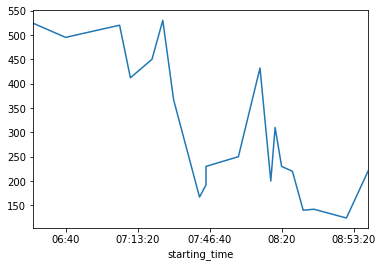

In [6]:
df['elapsed_time'].plot()

The trend is clear and it is obvious that the best hour for shower is between 8:30 - 8.50 AM.
I am very interested if the excelent measurement at 07:45 was just a lucky day or a a close neighbour does his shower every day at exactly this hour, warming the water for me.

However, let's plot a box plot for more insights

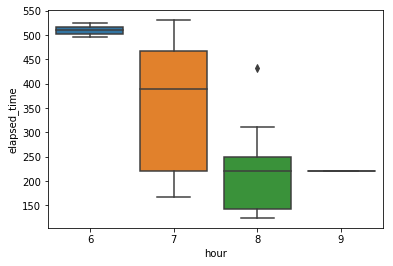

In [7]:
import seaborn as sns
df['hour'] = [d.hour for d in df.index]
sns.boxplot(x='hour',y='elapsed_time', data=df)

We can see that the box plot confirms the decreasing trend in elapsed_time.
I am going to also do a seasonal plot for each hour


In [8]:
df['minute'] = [d.minute for d in df.index]

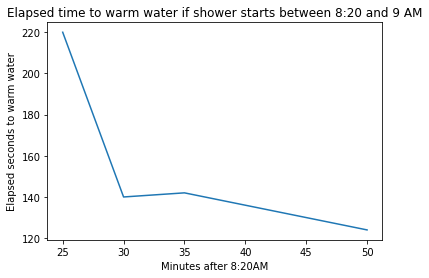

In [9]:
import matplotlib.pyplot as plt

plt.plot('minute','elapsed_time',data=df.loc[(df['hour']==8)&(df['minute']>20) ,:].sort_values(by=['minute']))
plt.title('Elapsed time to warm water if shower starts between 8:20 and 9 AM')
plt.xlabel('Minutes after 8:20AM')
plt.ylabel('Elapsed seconds to warm water')
plt.show()



From the above plot, it is double clear that best time to do the shower is between 8:30 AM and 9 AM.
It could be the case that further reduction of water consumption could be possible after 9AM, but it is too late to go to work :)

In [10]:
df['elapsed_time'].mean()

307.75

Now, let's make a educated guess how much water is saved. It has to be mentioned that the water flow capacity is always constant for my shower.

The average time for shower itself is 300 seconds and average elapsed_time for warming water is around 310s !


My water consumption for the 20 days of the experiment was around 3 cubic meters. The cost of a cubic meter of hot water is aproximately 4 euros, so that total cost is around 12 euros.

Half of the 12 euros comes from wasted water, so more than 6 euros!

If I just do the shower between 8:20 to 9 AM, average elapsed_time for warming water is 170s.

Doing some simple math, it results that if I change my shower behaviour between 8:30 and 9 AM, i will save approximately 2.60 euros per month :)

Not a great saving, but it shows that data analytics can have an influence in everyone's life!